In [1]:
import numpy as np
import scipy.io as sio 
import matplotlib.pyplot as plt

In [2]:
mat  = sio.loadmat('./data/ex8data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [3]:
X= mat['X']
Xval,yval = mat['Xval'],mat['yval']
X.shape,Xval.shape,yval.shape

((307, 2), (307, 2), (307, 1))

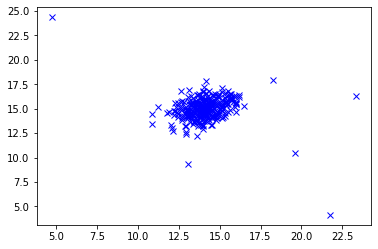

In [4]:
plt.plot(X[:,0],X[:,1],'bx')
plt.show()

In [5]:
def estimateGaussian(X,isCovariance):
    means = np.mean(X,axis=0)
    if isCovariance:
        sigma2 = (X - means).T@(X-means)/len(X)
    else:
        sigma2 = np.var(X,axis = 0)
    return means,sigma2

In [6]:
means,sigma2 = estimateGaussian(X,isCovariance = True)
sigma2

array([[ 1.83263141, -0.22712233],
       [-0.22712233,  1.70974533]])

In [7]:
means,sigma2 = estimateGaussian(X,isCovariance=False)
sigma2

array([1.83263141, 1.70974533])

In [8]:
def gaussian(X,means,sigma2):
    if np.ndim(sigma2)==1:
        sigma2 = np.diag(sigma2)
    
    X = X-means
    n = X.shape[0]

    first = np.power(2*np.pl,-n/2)*(np.linalg.det(sigma2)**(-0.5))
    second = np.diag(X@np.linalg.inv(sigma2)@x.T)
    p = first * np.exp(-0.5*second)
    p = p .reshape(-1,1)

    return p


In [ ]:
def plotGaussian(X,means,sigma2):
    